In [1]:
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly.offline import iplot
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve

In [2]:
league = pd.read_csv("games.csv")

In [3]:
league.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [4]:
# check for null values
league.isna().sum().sum()
# provide more info for developing algorithm
league.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


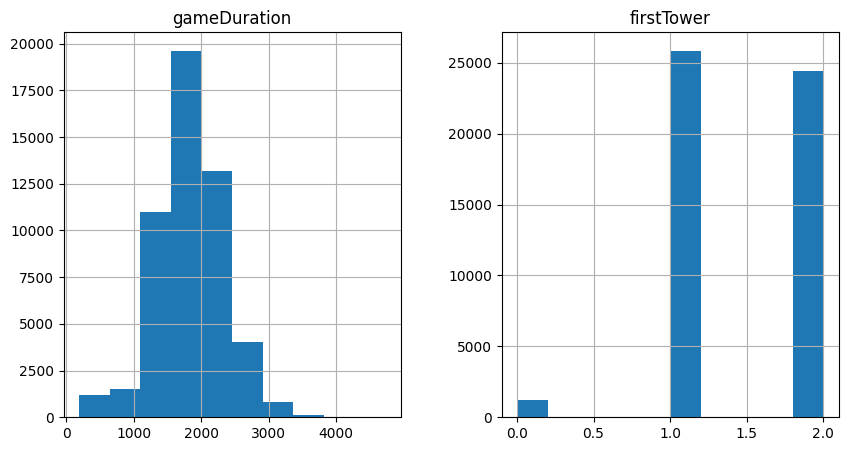

In [5]:
league[['gameDuration', 'firstTower']].hist(figsize=(10,5))
plt.show()

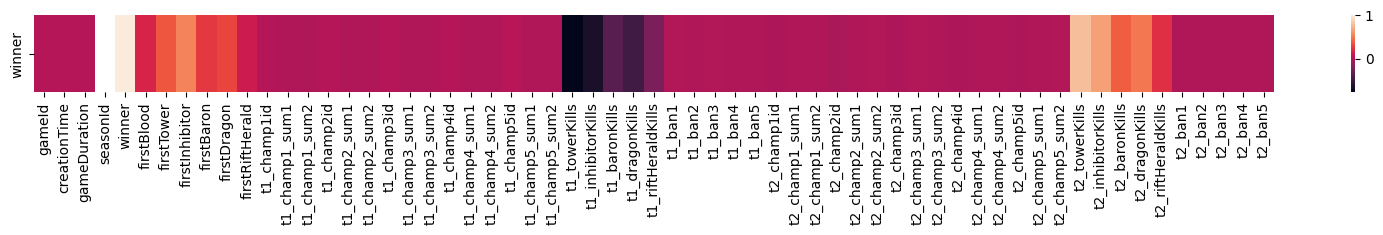

In [6]:
winner_correlation_matrix = league.corr()['winner'].to_frame().T 
plt.subplots(figsize=(20, 1))
sns.heatmap(winner_correlation_matrix)
plt.show()

In [7]:
correlation_threshold = 0.3

attributes = list(filter(lambda x: abs(float(winner_correlation_matrix[x].iloc[0])) > correlation_threshold, league.columns))

print('Total of useful attributes:', attributes, len(attributes), '.')


Total of useful attributes: ['winner', 'firstTower', 'firstInhibitor', 'firstDragon', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills'] 12 .


NameError: name 'idx' is not defined

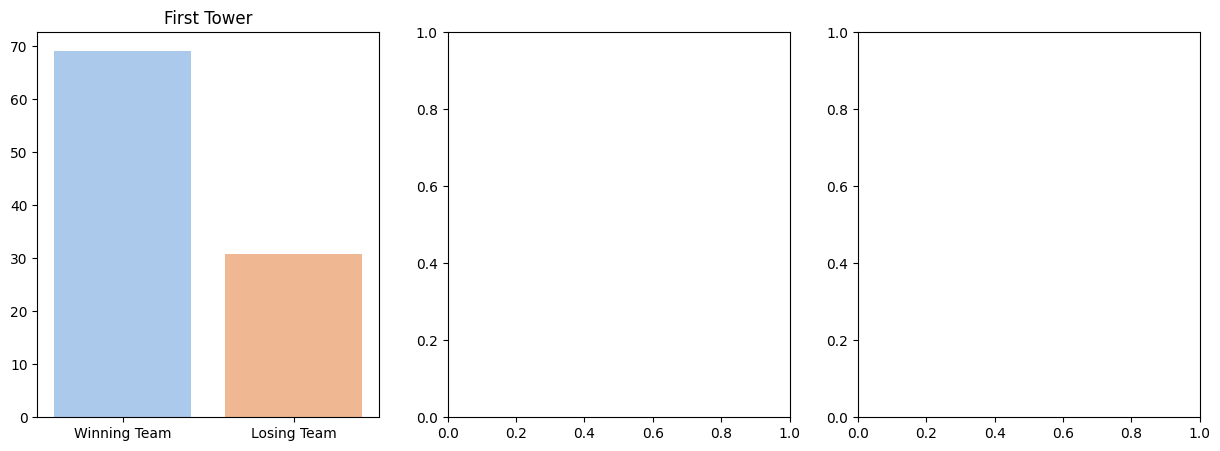

In [8]:
""" 
EXPLANATION:
    according to the heatmap, t1_towerKills and t2_towerKills have strong correlation values
    the rest of the attributes are considered medium strength correlation values.
"""
objectives = [x for x in attributes if 'first' in x]
fig, ax = plt.subplots(1, len(objectives), figsize=(15, 5))
total = league.shape[0]

for i, objective in enumerate(objectives):
    
    # calculating win percentage based on first objectives
    first_objective_wins = league[league[objective] == league['winner']].shape[0]
    first_objective_wins = round((first_objective_wins / total) * 100, 2)
    first_objective_loses = 100 - first_objective_wins
    
    ax[i].set_title(objective.replace('first', 'First '))
    sns.barplot(x=['Winning Team', 'Losing Team'],
                y=[first_objective_wins, first_objective_loses],
                hue=['Winning Team', 'Losing Team'],
                palette='pastel',
                ax=ax[i],
                legend=False)
    ax[idx].set_ylabel('Percentage (%)')


plt.tight_layout()
plt.show()

In [ ]:
objectives = [x for x in attributes if 'Kills' in x]
objectives = list(set(map(lambda x: x.split('_')[-1], objectives)))
fig, ax = plt.subplots(1, len(objectives), figsize=(15, 5))

for i, objective in enumerate(objectives):
    
    # We filter the games in which the team 1 has won.
    t1_wins = league[league['winner'] == 1][['t1_' + objective, 't2_' + objective]]
    t1_wins.columns = ['winner', 'loser']
    
    # We filter the games in which the team 2 has won.
    t2_wins = league[league['winner'] == 2][['t2_' + objective, 't1_' + objective]]
    t2_wins.columns = ['winner', 'loser']
    
    # We compute the mean of the winning/losing objective kills.
    mean = pd.concat([t1_wins, t2_wins], axis=0).mean(axis=0)

    ax[i].set_title(objective.replace('Kills', ' Kills').capitalize())
    x=['Winning Team', 'Losing Team']
    sns.barplot(x=['Winning Team', 'Losing Team'],
                y=[mean['winner'], mean['loser']],
                hue=x,
                palette='muted',
                ax=ax[i],
                )
plt.tight_layout()
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

"""
EXPLANATION:
feature variables: everything in attributes except for winner
target variables: winner column

split the train and test, 80% and 20%

cross-validation factor is set equal to 10 fold

create a dictionary of parameters categorized into splitters, max_depth, and criteria with different key pairs to try

create the decision tree and look for the best parameters using GridSearchCV
"""
league = league[attributes]
X = league.drop(labels='winner', axis=1)
y = league['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

k = 10

parameters = dict()
# check which estimators will be useful
# list_params = decision_tree.get_params()
# print(list_params)

parameters['splitter'] = ['best', 'random']
parameters['max_depth'] = range(1, len(attributes))
parameters['criterion'] = ['gini', 'entropy']
# parameters['max_features'] = range(1, len(attributes))

decision_tree = DecisionTreeClassifier()

grid_decision_tree = GridSearchCV(estimator=decision_tree, cv=k, param_grid=parameters)
grid_decision_tree.fit(X_train, y_train)

print("Best parameters: ", grid_decision_tree.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


In [10]:
# fit the model with the best parameters we found
best_params = grid_decision_tree.best_params_

decision_tree = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], splitter=best_params['splitter'])
decision_tree = decision_tree.fit(X_train, y_train)

In [11]:
y_prediction = decision_tree.predict(X_test)

accuracy = round(accuracy_score(y_test, y_prediction)*100, 2)

print('Accuracy:', accuracy, '%')

Accuracy: 96.72 %


Accuracy: 0.9672
Precision: 0.9807
Recall (Sensitivity): 0.9558
Specificity: 0.9795
F1 Score: 0.9681


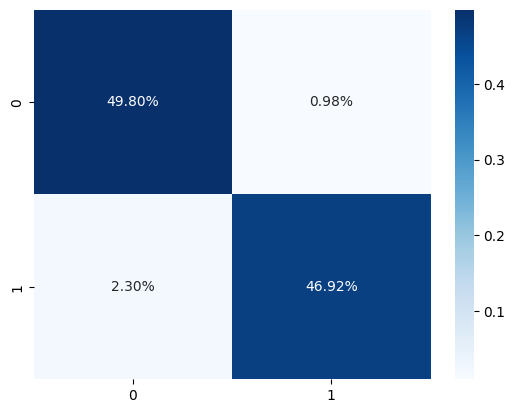

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
cf_matrix = confusion_matrix(y_test, y_prediction)
TP = cf_matrix[0,0]
FP = cf_matrix[0,1]
FN = cf_matrix[1,0]
TN = cf_matrix[1,1]
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
f1_score = 2*(precision*recall)/(precision+recall)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")

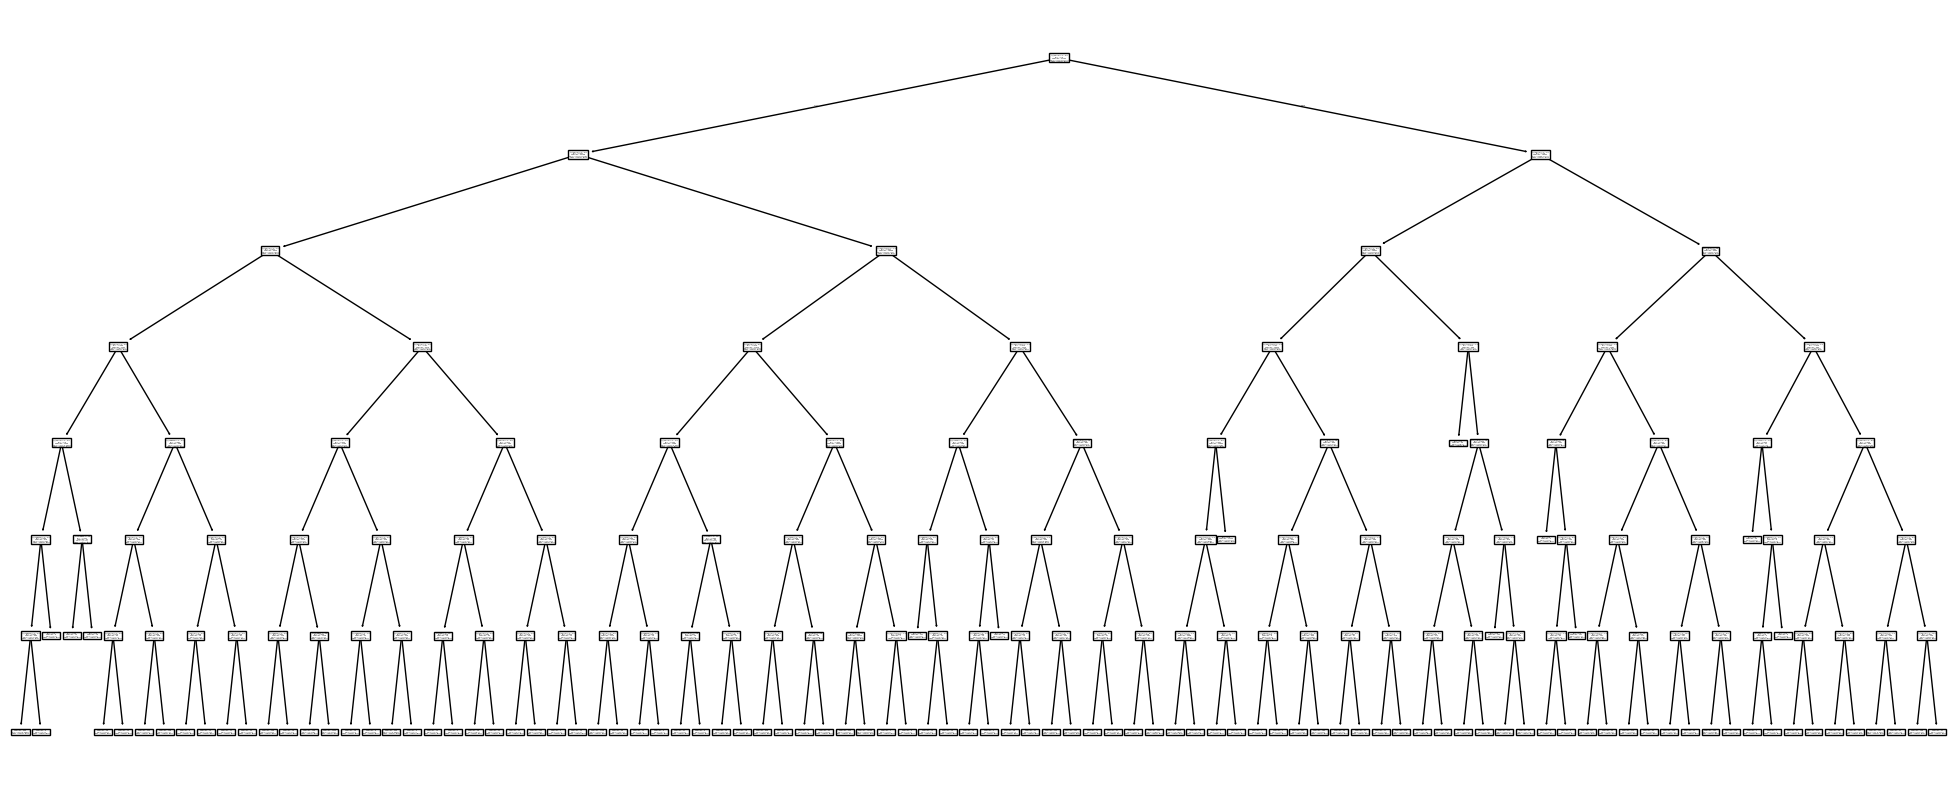

In [15]:
fn = list(X_train.columns)
cn = ['Team 1 wins', 'Team 2 wins']

fig, axes = plt.subplots(figsize=(25, 10))
tree.plot_tree(decision_tree, feature_names=fn, class_names=cn)
plt.show()

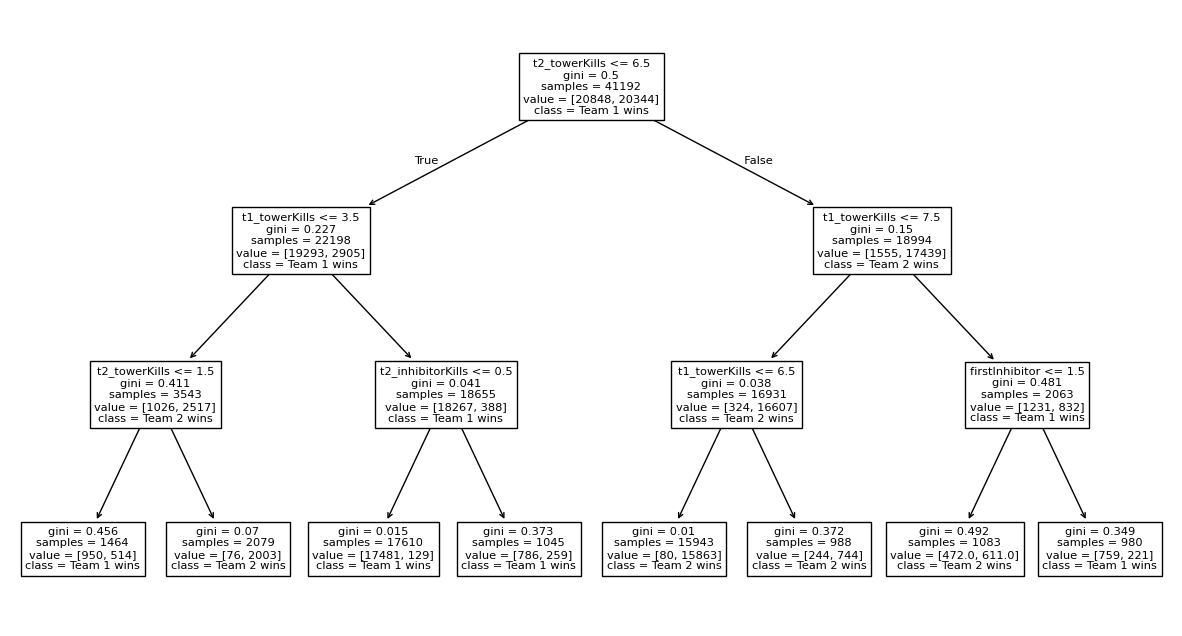

In [19]:
small_decision_tree = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=3, splitter=best_params['splitter'])
small_decision_tree = small_decision_tree.fit(X_train, y_train)

fig, axes = plt.subplots(figsize=(15, 8))
tree.plot_tree(small_decision_tree, feature_names=fn, class_names=cn)
plt.show()